In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
DF_cleaned=pd.read_csv('DF_nettoyé.csv')

In [36]:
DF_cleaned.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,somme_conso(kBtu),conso*surface(kBtu),AGE,dif_conso(kBtu),dif_energie_surface(kBtu),%_elec(kBtu),%_gas(kBtu),%_steam(kBtu),%_parking,%_immeuble
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,7226362.00,7.225058e+06,97,0.50,-2.318525e+05,55.0,18.0,28.0,0.0,100.0
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,8387933.00,9.818057e+06,28,0.00,1.153578e+06,39.0,61.0,0.0,15.0,85.0
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,72587018.00,9.178656e+07,55,6.00,1.784945e+07,68.0,2.0,30.0,21.0,79.0
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,6794583.25,6.794256e+06,98,0.75,-1.525443e+05,41.0,27.0,33.0,0.0,100.0
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,14172605.00,2.015658e+07,44,1.00,5.500082e+06,38.0,62.0,0.0,35.0,65.0


In [37]:
DF_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3314 non-null   int64  
 1   BuildingType                     3314 non-null   object 
 2   PrimaryPropertyType              3314 non-null   object 
 3   PropertyName                     3314 non-null   object 
 4   Address                          3314 non-null   object 
 5   ZipCode                          3314 non-null   float64
 6   TaxParcelIdentificationNumber    3314 non-null   object 
 7   CouncilDistrictCode              3314 non-null   int64  
 8   Neighborhood                     3314 non-null   object 
 9   Latitude                         3314 non-null   float64
 10  Longitude                        3314 non-null   float64
 11  YearBuilt                        3314 non-null   int64  
 12  NumberofBuildings   

# STATSMODELS

In [38]:
DF_cleaned=DF_cleaned.loc[DF_cleaned['BuildingType']=='NonResidential']

In [39]:
DF_cleaned.shape

(1439, 51)

In [40]:
col_num=[]
col_obj=[]
for col in DF_cleaned.columns:
    if DF_cleaned[col].dtype in ['int64','float64']:
        col_num.append(col)
    else:
        col_obj.append(col)

In [41]:
for col in ['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
            'ENERGYSTARScore','conso*surface(kBtu)','dif_energie_surface(kBtu)','OSEBuildingID'
            ,'GHGEmissionsIntensity','YearBuilt','PropertyGFABuilding(s)','SiteEUI(kBtu/sf)'
            ,'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)'
            ,'Electricity(kWh)','Electricity(kBtu)','somme_conso(kBtu)','NaturalGas(therms)'
            ,'NaturalGas(kBtu)','dif_conso(kBtu)','SteamUse(kBtu)','TotalGHGEmissions','Latitude'
            ,'Longitude']:
    del(col_num[col_num.index(col)])

In [42]:
'SiteEnergyUseWN(kBtu)' in col_num

True

In [43]:
import statsmodels.api as sm
y=DF_cleaned['SiteEnergyUseWN(kBtu)']
X=DF_cleaned[col_num].drop(['SiteEnergyUseWN(kBtu)'],axis=1)

X=sm.add_constant(X)

## CREATION ET ENTRAINEMENT DU MODELE

In [44]:
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     SiteEnergyUseWN(kBtu)   R-squared:                       0.580
Model:                               OLS   Adj. R-squared:                  0.577
Method:                    Least Squares   F-statistic:                     179.2
Date:                   Thu, 24 Oct 2024   Prob (F-statistic):          1.57e-259
Time:                           12:08:51   Log-Likelihood:                -25563.
No. Observations:                   1439   AIC:                         5.115e+04
Df Residuals:                       1427   BIC:                         5.121e+04
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

## SELECTION VARIABLES

1. Analyse des corrélations

Corrélations avec SiteEnergyUse:
SiteEnergyUseWN(kBtu)    1.000000
PropertyGFATotal         0.650137
NumberofBuildings        0.454792
NumberofFloors           0.417542
PropertyGFAParking       0.252715
%_steam(kBtu)            0.193209
CouncilDistrictCode      0.102459
%_parking                0.096694
%_elec(kBtu)             0.004822
ZipCode                 -0.050799
%_gas(kBtu)             -0.072278
%_immeuble              -0.096694
AGE                     -0.155753
Name: SiteEnergyUseWN(kBtu), dtype: float64


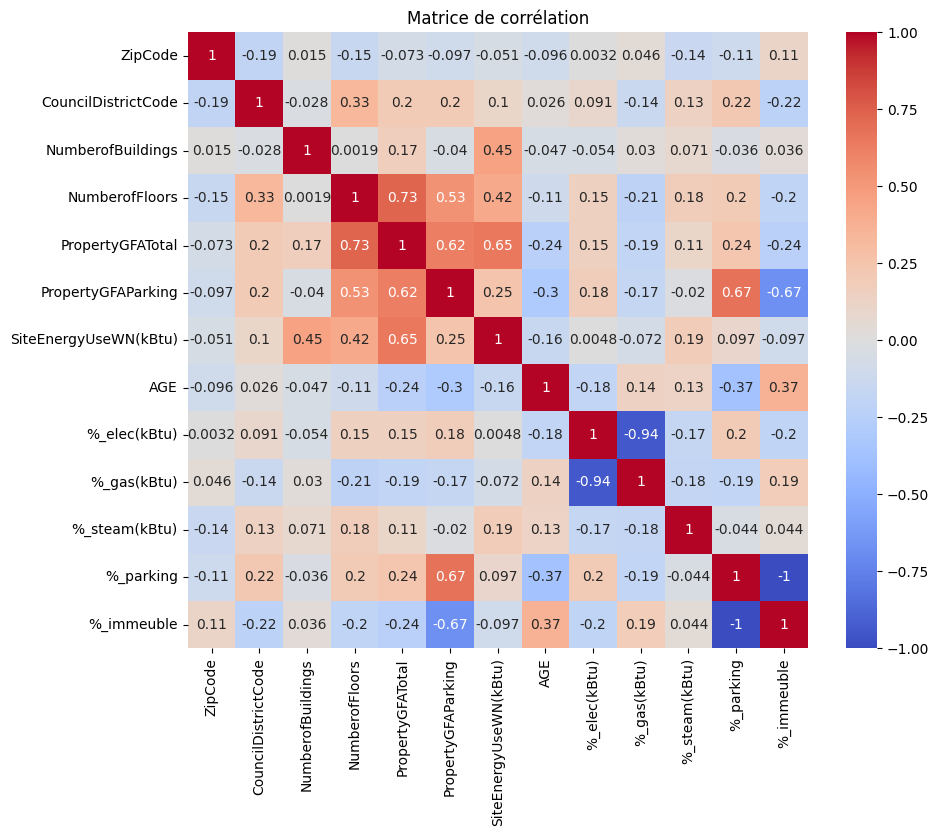


2. Tests de significativité individuelle

Résumé des p-values:
                                Variable        P-value  Significatif
PropertyGFATotal        PropertyGFATotal  3.482672e-109          True
NumberofBuildings      NumberofBuildings   4.633204e-61          True
PropertyGFAParking    PropertyGFAParking   2.301376e-15          True
AGE                                  AGE   1.925797e-01         False
%_steam(kBtu)              %_steam(kBtu)   1.933485e-01         False
%_gas(kBtu)                  %_gas(kBtu)   2.164647e-01         False
%_elec(kBtu)                %_elec(kBtu)   2.212760e-01         False
CouncilDistrictCode  CouncilDistrictCode   5.953751e-01         False
NumberofFloors            NumberofFloors   6.616837e-01         False
ZipCode                          ZipCode   6.677815e-01         False
%_parking                      %_parking   8.176396e-01         False
const                              const   8.207674e-01         False
%_immeuble                

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


data=DF_cleaned[col_num]


# 1. Analyse des corrélations
print("1. Analyse des corrélations")
correlations = DF_cleaned[col_num].corr()['SiteEnergyUseWN(kBtu)'].sort_values(ascending=False)
print("\nCorrélations avec SiteEnergyUse:")
print(correlations)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(DF_cleaned[col_num].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

# 2. Test de significativité individuelle
print("\n2. Tests de significativité individuelle")
X = sm.add_constant(data.drop('SiteEnergyUseWN(kBtu)', axis=1))
model = sm.OLS(data['SiteEnergyUseWN(kBtu)'], X).fit()
print("\nRésumé des p-values:")
p_values = pd.DataFrame({
    'Variable': X.columns,
    'P-value': model.pvalues,
    'Significatif': model.pvalues < 0.05
}).sort_values('P-value')
print(p_values)

# 3. Analyse VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

print("\n3. Analyse VIF (multicolinéarité)")
vif_data = calculate_vif(X.drop('const', axis=1))
print(vif_data)

# 4. Analyse des R² ajustés avec différentes combinaisons
def evaluate_feature_importance(data):
    results = []
    base_features = []
    remaining_features = list(data.drop('SiteEnergyUseWN(kBtu)', axis=1).columns)
    
    while remaining_features:
        best_score = -np.inf
        best_feature = None
        
        for feature in remaining_features:
            current_features = base_features + [feature]
            X = sm.add_constant(data[current_features])
            model = sm.OLS(data['SiteEnergyUseWN(kBtu)'], X).fit()
            score = model.rsquared_adj
            
            results.append({
                'features': ', '.join(current_features),
                'feature_added': feature,
                'r2_adj': score
            })
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            base_features.append(best_feature)
            remaining_features.remove(best_feature)
            
    return pd.DataFrame(results)

print("\n4. Analyse progressive des caractéristiques")
feature_importance = evaluate_feature_importance(data=data)
print(feature_importance.sort_values('r2_adj', ascending=False).head())

# 5. Sélection finale des variables
def select_significant_variables(data, threshold_p_value=0.05, threshold_vif=125):
    # Première étape : sélection basée sur p-value
    X = sm.add_constant(data.drop('SiteEnergyUseWN(kBtu)', axis=1))
    model = sm.OLS(data['SiteEnergyUseWN(kBtu)'], X).fit()
    significant_vars = X.columns[model.pvalues < threshold_p_value].tolist()
    
    
    # Deuxième étape : vérification VIF
    selected_vars = []
    X_significant = data[significant_vars]
    vif_data = calculate_vif(X_significant)
    
    for var in significant_vars:
        if vif_data[vif_data['Variable'] == var]['VIF'].values[0] < threshold_vif:
            selected_vars.append(var)
    #selected_vars.remove('const')
    return selected_vars

print("\n5. Sélection finale des variables")
selected_vars = select_significant_variables(data)
print("\nVariables sélectionnées:")
print(selected_vars)

# Modèle final avec les variables sélectionnées
X_final = sm.add_constant(data[selected_vars])
final_model = sm.OLS(data['SiteEnergyUseWN(kBtu)'], X_final).fit()
print("\nRésumé du modèle final:")
print(final_model.summary())

### vERIFICATION DES CORRELATIONS

In [46]:
def check_correlations(data, threshold=0.95):
    corr_matrix = data.corr().abs()
    high_corr = np.where(corr_matrix > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

check_correlations(DF_cleaned[col_num])

Attention : Fortes corrélations détectées
%_parking - %_immeuble: 1.000


[('%_parking', '%_immeuble', 0.9999999999999997)]

# VARIABLES CIBLES

    - SiteEnergyUse

    - TotalGHGEmissions

# 1) 'SiteEUIWN(kBtu/sf)'

### DUMMY

In [47]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X=DF_cleaned[col_num].drop(['SiteEnergyUseWN(kBtu)'],axis=1)
y=DF_cleaned['SiteEnergyUseWN(kBtu)']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un Dummy Regressor qui prédit la moyenne
dummy_reg = DummyRegressor(strategy="mean")

# Entraîner le modèle
dummy_reg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = dummy_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error: 192997524374372.28
Root Mean Squared Error: 13892354.889448091
R² Score: -0.012452012726447137


### REGRESSION LINEAIRE

In [48]:
from sklearn.linear_model import LinearRegression

# Créer et entraîner un modèle de régression linéaire
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prédictions
y_pred_linear = linear_reg.predict(X_test)

# Évaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R² Score: {r2_linear}")


Linear Regression MSE: 97176564138977.7
Linear Regression R² Score: 0.49021829025381414


### REPRESENTATION

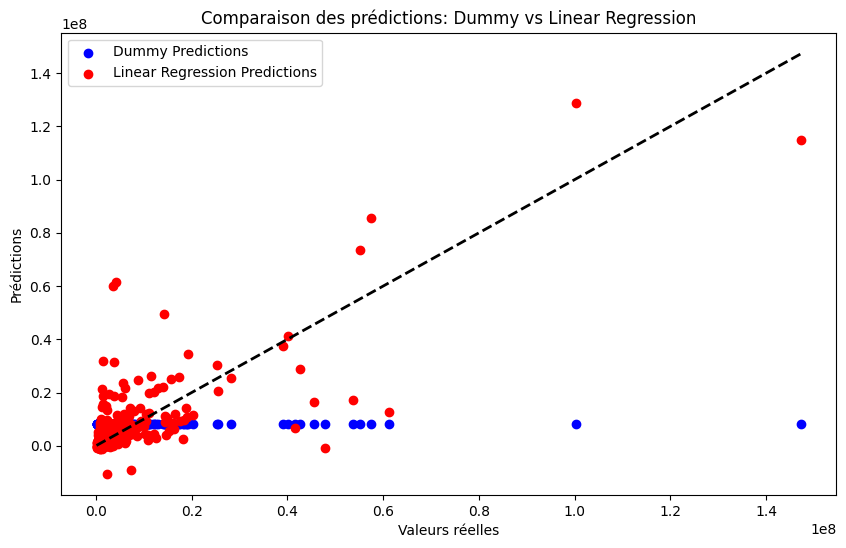

In [49]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dummy Predictions')
plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Comparaison des prédictions: Dummy vs Linear Regression')
plt.legend()
plt.show()

In [50]:
col_num=['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking']

In [51]:
col_num=['NumberofBuildings', 'PropertyGFATotal', 'PropertyGFAParking']

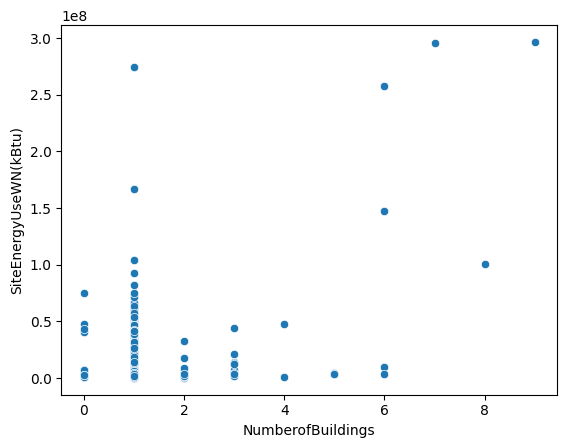

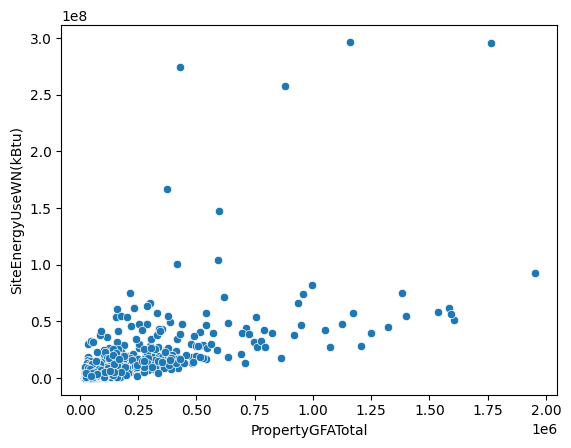

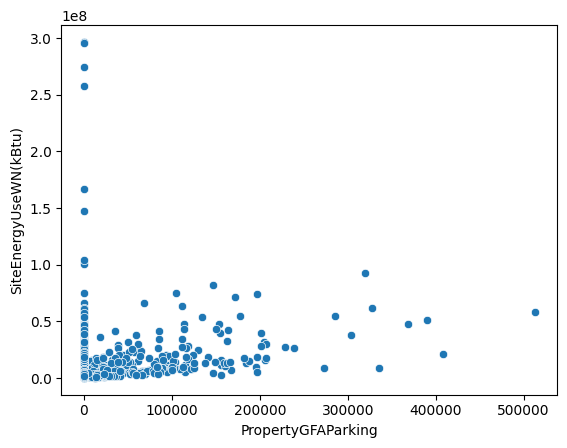

In [52]:
for col in col_num:
    sns.scatterplot(DF_cleaned,x=col,y='SiteEnergyUseWN(kBtu)')
    plt.show()

In [53]:
from sklearn.linear_model import LinearRegression

X=DF_cleaned[col_num]
y=DF_cleaned['SiteEnergyUseWN(kBtu)']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Créer et entraîner un modèle de régression linéaire
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prédictions
y_pred_linear = linear_reg.predict(X_test)

# Évaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R² Score: {r2_linear}")


Linear Regression MSE: 103062188305729.06
Linear Regression R² Score: 0.4593427023254433


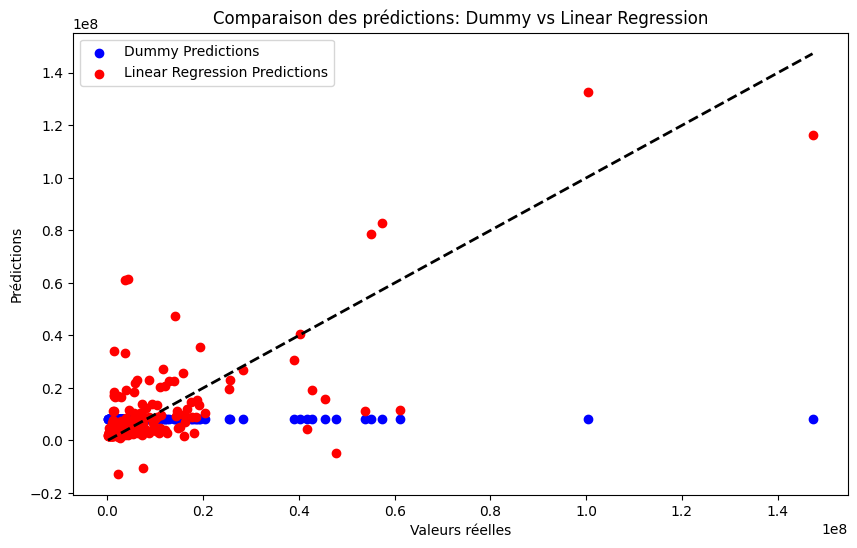

In [54]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dummy Predictions')
plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Comparaison des prédictions: Dummy vs Linear Regression')
plt.legend()
plt.show()

1. Test de linéarité


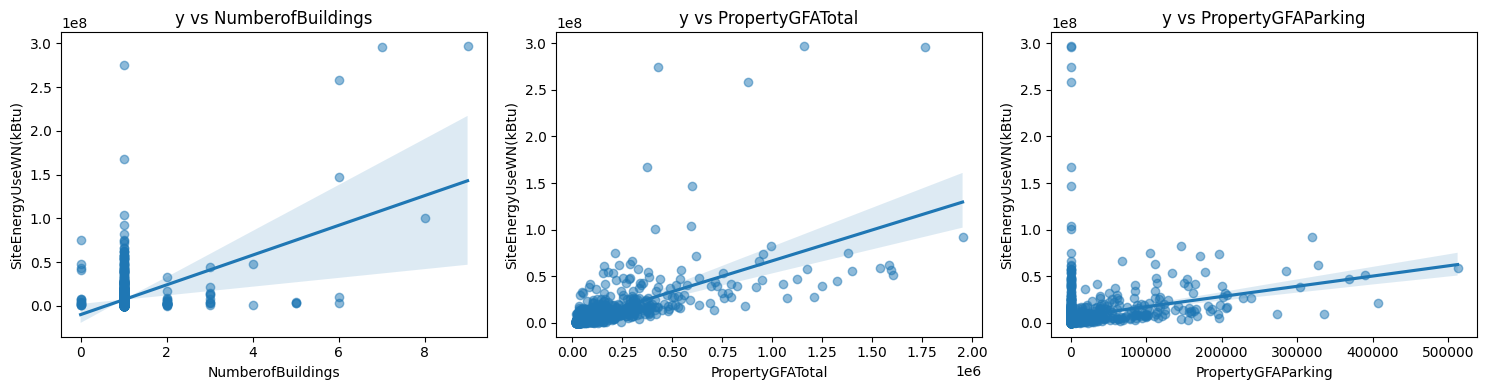


2. Test de normalité des résidus


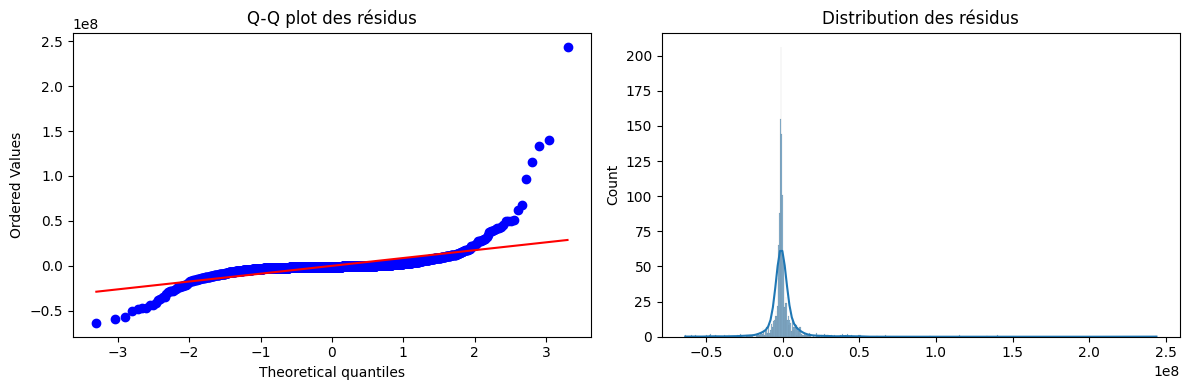

Test de Shapiro-Wilk: p-value = 0.0000
Résidus normaux si p-value > 0.05

3. Test d'homoscédasticité


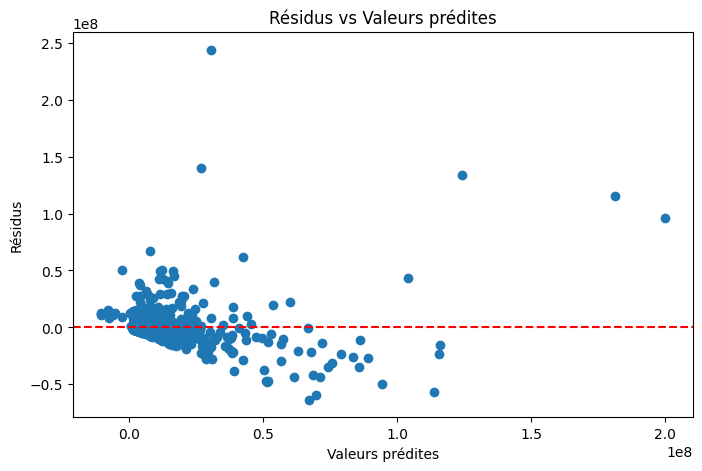

Test de Breusch-Pagan: p-value = 0.0000
Homoscédasticité si p-value > 0.05

4. Test d'indépendance des résidus
Test de Durbin-Watson: 1.9648
Proche de 2 = bon (pas d'autocorrélation)

5. Test de multicolinéarité
VIF pour chaque variable :
             Variable       VIF
0   NumberofBuildings  1.402859
1    PropertyGFATotal  2.353294
2  PropertyGFAParking  1.834130
VIF > 5 ou 10 = problème potentiel

6. Détection des outliers


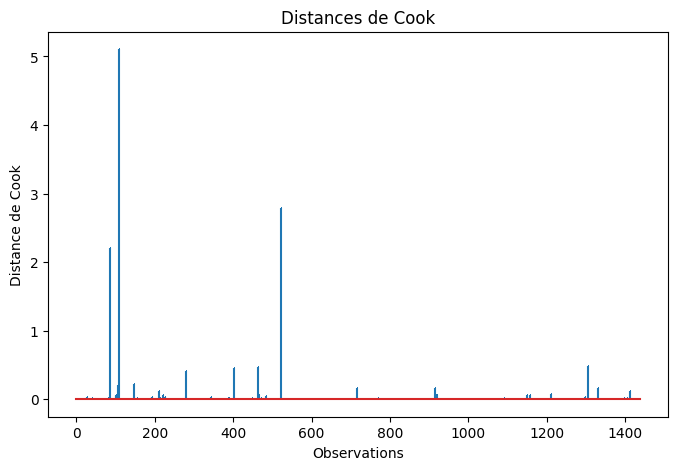

Nombre d'outliers potentiels (Distance de Cook > 0.0028): 73


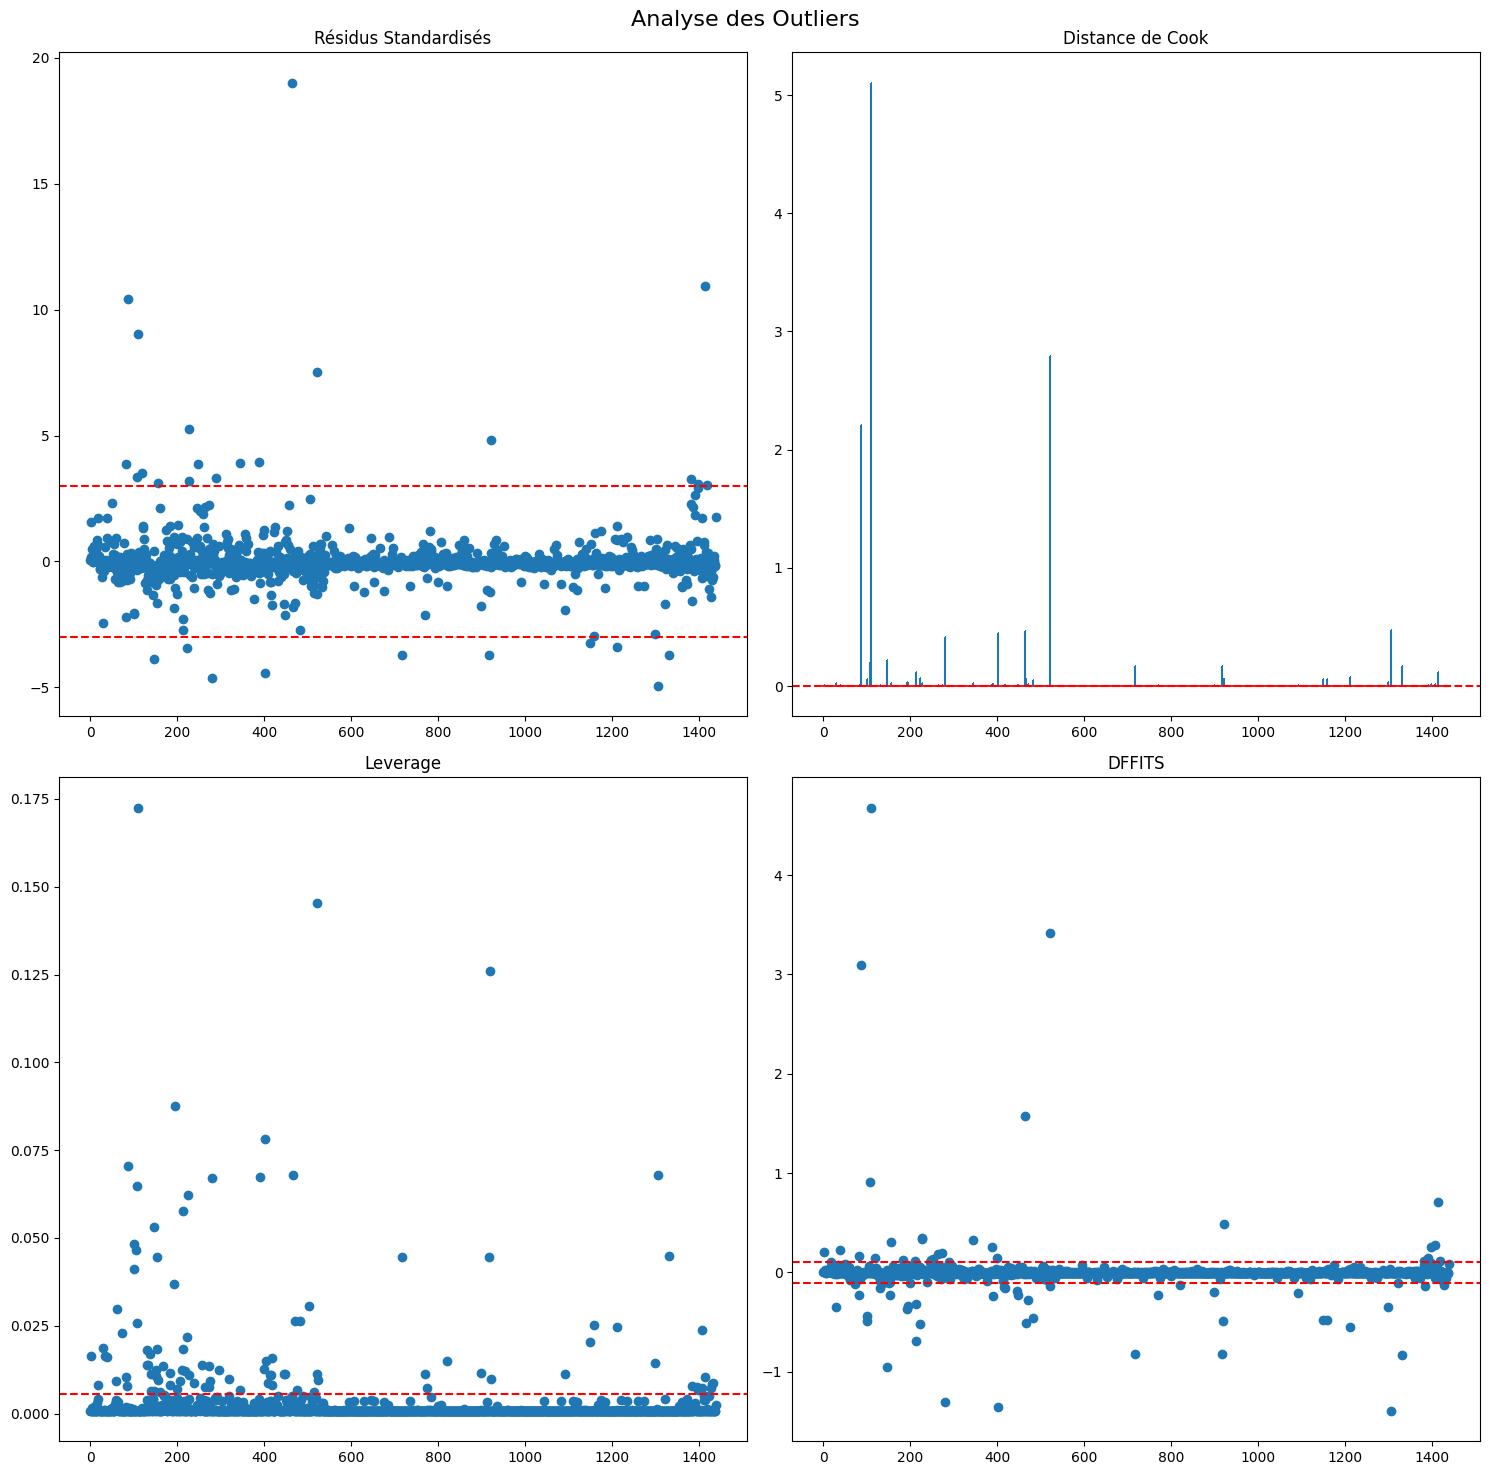


Seuils utilisés :
Residus_std: 3.0000
Cooks_Distance: 0.0028
Leverage: 0.0056
DFFITS: 0.1054

Nombre d'outliers détectés par méthode :
Residus_std: 29 outliers
Cooks_Distance: 73 outliers
Leverage: 99 outliers
DFFITS: 73 outliers

Observations problématiques (flaggées par plusieurs méthodes) :

Indices des observations flaggées par plusieurs méthodes :
Observation 118: flaggée par 4 méthodes
Valeurs des métriques pour cette observation :
  - Residus_std: 10.4082 (seuil: ±3.0000)
  - Cooks_Distance: 2.2054 (seuil: ±0.0028)
  - Leverage: 0.0705 (seuil: ±0.0056)
  - DFFITS: 3.0972 (seuil: ±0.1054)

Observation 158: flaggée par 4 méthodes
Valeurs des métriques pour cette observation :
  - Residus_std: 3.3572 (seuil: ±3.0000)
  - Cooks_Distance: 0.2079 (seuil: ±0.0028)
  - Leverage: 0.0647 (seuil: ±0.0056)
  - DFFITS: 0.9155 (seuil: ±0.1054)

Observation 161: flaggée par 4 méthodes
Valeurs des métriques pour cette observation :
  - Residus_std: 9.0143 (seuil: ±3.0000)
  - Cooks_Distance: 5

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def check_hetero(X, residus):
    try:
        # Premier format possible de retour
        lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residus, X)
        return f_pvalue
    except ValueError:
        try:
            # Deuxième format possible de retour
            lm, lm_pvalue = het_breuschpagan(residus, X)
            return lm_pvalue
        except:
            print("Impossible de réaliser le test de Breusch-Pagan")
            return None


def check_regression_assumptions(X, y):
    """
    Fonction complète pour vérifier toutes les hypothèses de la régression linéaire
    """
    # Ajout de la constante pour statsmodels
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    residus = model.resid
    fitted_values = model.fittedvalues

    # 1. Linéarité
    print("1. Test de linéarité")
    fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 4))
    for i, col in enumerate(X.columns):
        sns.regplot(x=X[col], y=y, ax=axes[i], scatter_kws={'alpha':0.5})
        axes[i].set_title(f'y vs {col}')
    plt.tight_layout()
    plt.show()

    # 2. Normalité des résidus
    print("\n2. Test de normalité des résidus")
    # QQ-plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    stats.probplot(residus, dist="norm", plot=ax1)
    ax1.set_title("Q-Q plot des résidus")
    
    # Histogramme
    sns.histplot(residus, kde=True, ax=ax2)
    ax2.set_title("Distribution des résidus")
    plt.tight_layout()
    plt.show()
    
    # Test de Shapiro-Wilk
    stat, p_value = stats.shapiro(residus)
    print(f"Test de Shapiro-Wilk: p-value = {p_value:.4f}")
    print("Résidus normaux si p-value > 0.05")

    # 3. Homoscédasticité
    print("\n3. Test d'homoscédasticité")
    plt.figure(figsize=(8, 5))
    plt.scatter(fitted_values, residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title("Résidus vs Valeurs prédites")
    plt.show()
    
    # Test de Breusch-Pagan modifié
    p_value = check_hetero(X_with_const, residus)
    if p_value is not None:
        print(f"Test de Breusch-Pagan: p-value = {p_value:.4f}")
        print("Homoscédasticité si p-value > 0.05")

    # 4. Indépendance des résidus
    print("\n4. Test d'indépendance des résidus")
    # Test de Durbin-Watson
    dw_stat = sm.stats.stattools.durbin_watson(residus)
    print(f"Test de Durbin-Watson: {dw_stat:.4f}")
    print("Proche de 2 = bon (pas d'autocorrélation)")

    # 5. Multicolinéarité
    print("\n5. Test de multicolinéarité")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("VIF pour chaque variable :")
    print(vif_data)
    print("VIF > 5 ou 10 = problème potentiel")

    # 6. Détection des outliers
    print("\n6. Détection des outliers")
    # Distance de Cook
    influence = model.get_influence()
    cook_distance = influence.cooks_distance[0]
    
    plt.figure(figsize=(8, 5))
    plt.stem(range(len(cook_distance)), cook_distance, markerfmt=',')
    plt.title("Distances de Cook")
    plt.xlabel("Observations")
    plt.ylabel("Distance de Cook")
    plt.show()
    
    # Seuil suggéré pour les distances de Cook
    seuil_cook = 4/(len(y))
    n_outliers = sum(cook_distance > seuil_cook)
    print(f"Nombre d'outliers potentiels (Distance de Cook > {seuil_cook:.4f}): {n_outliers}")

    return model

# Utilisation de la fonction
model = check_regression_assumptions(X, y)

def detect_outliers(X, y, model):
    """
    Détection détaillée des outliers avec plusieurs méthodes
    """
    # Création d'un DataFrame pour stocker toutes les informations
    df_diagnostics = pd.DataFrame(index=X.index)
    
    # 1. Résidus standardisés
    residus = model.resid
    residus_std = residus / np.std(residus)
    df_diagnostics['Residus_std'] = residus_std
    
    # 2. Distance de Cook
    influence = model.get_influence()
    df_diagnostics['Cooks_Distance'] = influence.cooks_distance[0]
    
    # 3. Levier (Leverage)
    df_diagnostics['Leverage'] = influence.hat_matrix_diag
    
    # 4. DFFITS
    df_diagnostics['DFFITS'] = influence.dffits[0]
    
    # Définition des seuils
    seuils = {
        'Residus_std': 3,  # Plus ou moins 3 écarts-types
        'Cooks_Distance': 4/len(y),  # Règle générale : 4/n
        'Leverage': 2 * (X.shape[1] + 1) / len(y),  # 2(p+1)/n
        'DFFITS': 2 * np.sqrt((X.shape[1] + 1) / len(y))  # 2√((p+1)/n)
    }
    
    # Identification des outliers selon chaque critère
    outliers = {
        'Residus_std': df_diagnostics.index[abs(df_diagnostics['Residus_std']) > seuils['Residus_std']],
        'Cooks_Distance': df_diagnostics.index[df_diagnostics['Cooks_Distance'] > seuils['Cooks_Distance']],
        'Leverage': df_diagnostics.index[df_diagnostics['Leverage'] > seuils['Leverage']],
        'DFFITS': df_diagnostics.index[abs(df_diagnostics['DFFITS']) > seuils['DFFITS']]
    }
    
    # Visualisations
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle('Analyse des Outliers', fontsize=16)
    
    # 1. Résidus standardisés
    axes[0, 0].scatter(range(len(residus_std)), residus_std)
    axes[0, 0].axhline(y=seuils['Residus_std'], color='r', linestyle='--')
    axes[0, 0].axhline(y=-seuils['Residus_std'], color='r', linestyle='--')
    axes[0, 0].set_title('Résidus Standardisés')
    
    # 2. Distance de Cook
    axes[0, 1].stem(range(len(df_diagnostics['Cooks_Distance'])), 
                    df_diagnostics['Cooks_Distance'], markerfmt=',')
    axes[0, 1].axhline(y=seuils['Cooks_Distance'], color='r', linestyle='--')
    axes[0, 1].set_title('Distance de Cook')
    
    # 3. Leverage
    axes[1, 0].scatter(range(len(df_diagnostics['Leverage'])), 
                      df_diagnostics['Leverage'])
    axes[1, 0].axhline(y=seuils['Leverage'], color='r', linestyle='--')
    axes[1, 0].set_title('Leverage')
    
    # 4. DFFITS
    axes[1, 1].scatter(range(len(df_diagnostics['DFFITS'])), 
                      df_diagnostics['DFFITS'])
    axes[1, 1].axhline(y=seuils['DFFITS'], color='r', linestyle='--')
    axes[1, 1].axhline(y=-seuils['DFFITS'], color='r', linestyle='--')
    axes[1, 1].set_title('DFFITS')
    
    plt.tight_layout()
    plt.show()
    
    # Affichage des résultats
    print("\nSeuils utilisés :")
    for metric, seuil in seuils.items():
        print(f"{metric}: {seuil:.4f}")
    
    print("\nNombre d'outliers détectés par méthode :")
    for metric, indices in outliers.items():
        print(f"{metric}: {len(indices)} outliers")
    
    # Identification des observations flaggées par plusieurs méthodes
    all_outliers = pd.Series(index=X.index, data=0)
    for indices in outliers.values():
        all_outliers[indices] += 1
    
    print("\nObservations problématiques (flaggées par plusieurs méthodes) :")
    problematic = all_outliers[all_outliers >= 4]
    
    Ligne_problémes=[]
    if len(problematic) > 0:
        print("\nIndices des observations flaggées par plusieurs méthodes :")
        for idx, count in problematic.items():
            Ligne_problémes.append(idx)
            print(f"Observation {idx}: flaggée par {count} méthodes")
            
            # Afficher les valeurs pour cette observation
            print("Valeurs des métriques pour cette observation :")
            for col in df_diagnostics.columns:
                value = df_diagnostics.loc[idx, col]
                seuil = seuils[col]
                if abs(value) > seuil:
                    print(f"  - {col}: {value:.4f} (seuil: ±{seuil:.4f})")
            print()
        
        # Optionnel : afficher les données originales pour ces observations
        if isinstance(X, pd.DataFrame):
            print("\nDonnées originales pour ces observations :")
            outlier_data = pd.concat([X.loc[problematic.index], 
                                    pd.Series(y[problematic.index], name='y')], axis=1)
            print(outlier_data)
    else:
        print("Aucune observation n'a été flaggée par plusieurs méthodes")
    
    return df_diagnostics, outliers, problematic,Ligne_problémes

# Utilisation
diagnostics, outliers, problematic,Ligne_problémes = detect_outliers(X, y, model)

# Fonction pour créer des recommandations basées sur les tests
def get_recommendations(X, y, model):
    """
    Fournit des recommandations basées sur les résultats des tests
    """
    recommendations = []
    residus = model.resid
    
    # Test de normalité
    _, p_value_norm = stats.shapiro(residus)
    if p_value_norm < 0.05:
        recommendations.append("""
        Problème de normalité des résidus:
        - Essayez de transformer la variable cible (log, sqrt, etc.)
        - Vérifiez la présence d'outliers
        - Considérez l'ajout de variables explicatives manquantes
        """)
    
    # Test d'homoscédasticité modifié
    try:
        # Premier format possible
        lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residus, sm.add_constant(X))
        p_value_bp = f_pvalue
    except ValueError:
        try:
            # Deuxième format possible
            lm, lm_pvalue = het_breuschpagan(residus, sm.add_constant(X))
            p_value_bp = lm_pvalue
        except:
            print("Impossible de réaliser le test de Breusch-Pagan")
            p_value_bp = None

    if p_value_bp is not None and p_value_bp < 0.05:
        recommendations.append("""
        Problème d'homoscédasticité:
        - Essayez une transformation de la variable cible
        - Utilisez des erreurs standards robustes
        - Considérez des modèles pondérés
        """)
    
    # Test d'autocorrélation
    dw_stat = sm.stats.stattools.durbin_watson(residus)
    if dw_stat < 1.5 or dw_stat > 2.5:
        recommendations.append("""
        Problème d'autocorrélation:
        - Vérifiez l'ordre des données (si temporelles)
        - Considérez des modèles de séries temporelles
        - Ajoutez des lags comme variables explicatives
        """)
    
    # Test de multicolinéarité
    vif_data = pd.DataFrame()
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    if any(vif_data["VIF"] > 5):
        recommendations.append("""
        Problème de multicolinéarité:
        - Supprimez une des variables corrélées
        - Utilisez une ACP
        - Combinez les variables corrélées
        """)
    
    return recommendations

# Utilisation
recommendations = get_recommendations(X, y, model)
if recommendations:
    print("\nRecommandations :")
    for i, rec in enumerate(recommendations, 1):
        print(f"\n{i}. {rec}")



In [56]:
DF_scaled=DF_cleaned[col_num+['SiteEnergyUseWN(kBtu)']]
DF_scaled.head()

,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,SiteEnergyUseWN(kBtu)
0,1.0,88434,0,7456910.0
1,1.0,103566,15064,8664479.0
2,1.0,956110,196718,73937112.0
3,1.0,61320,0,6946800.5
4,1.0,175580,62000,14656503.0


In [57]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
DF_scaled['SiteEnergyUseWN(kBtu)']=std_scaler.fit_transform(DF_scaled[['SiteEnergyUseWN(kBtu)']])
DF_scaled['PropertyGFATotal']=std_scaler.fit_transform(DF_scaled[['PropertyGFATotal']])
DF_scaled['PropertyGFAParking']=std_scaler.fit_transform(DF_scaled[['PropertyGFAParking']])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4436\1705699754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_scaled['SiteEnergyUseWN(kBtu)']=std_scaler.fit_transform(DF_scaled[['SiteEnergyUseWN(kBtu)']])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4436\1705699754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_scaled['PropertyGFATotal']=std_scaler.fit_transform(DF_scaled[['PropertyGFATotal']])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4436\1705699754.py:6: SettingWithCopyWarning: 
A value 

In [58]:
DF_scaled.head()

,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,SiteEnergyUseWN(kBtu)
0,1.0,-0.128754,-0.322789,-0.026225
1,1.0,-0.049314,0.014512,0.036108
2,1.0,4.426348,4.081961,3.405393
3,1.0,-0.271096,-0.322789,-0.052557
4,1.0,0.328743,1.065465,0.345408


In [59]:
from sklearn.linear_model import LinearRegression

X=DF_scaled[col_num]
y=DF_scaled['SiteEnergyUseWN(kBtu)']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Créer et entraîner un modèle de régression linéaire
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prédictions
y_pred_linear = linear_reg.predict(X_test)

# Évaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R² Score: {r2_linear}")


Linear Regression MSE: 0.2746076420863895
Linear Regression R² Score: 0.4593427023254435


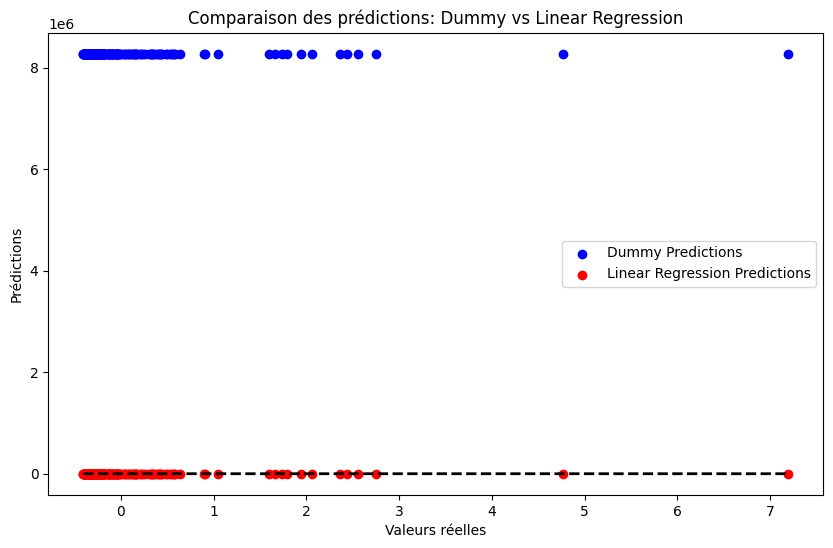

In [60]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dummy Predictions')
plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Comparaison des prédictions: Dummy vs Linear Regression')
plt.legend()
plt.show()

In [61]:
DF_scaled.head()

,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,SiteEnergyUseWN(kBtu)
0,1.0,-0.128754,-0.322789,-0.026225
1,1.0,-0.049314,0.014512,0.036108
2,1.0,4.426348,4.081961,3.405393
3,1.0,-0.271096,-0.322789,-0.052557
4,1.0,0.328743,1.065465,0.345408


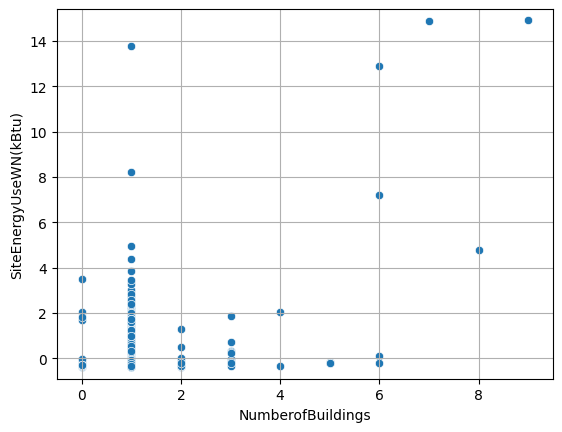

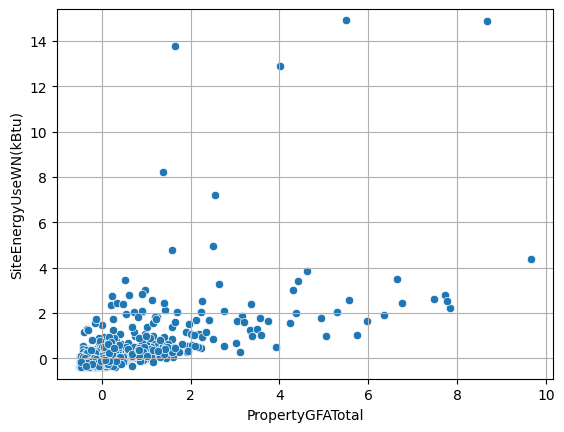

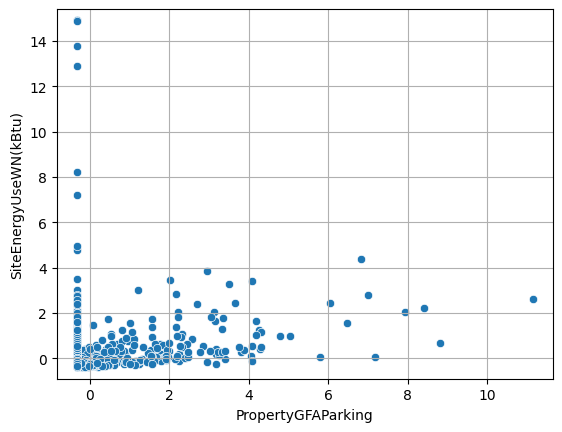

In [62]:

for col in col_num:
    

        ax = sns.scatterplot(data=DF_scaled, x=col, y='SiteEnergyUseWN(kBtu)')
        # Forcer les limites des axes autour de données standardisées
        plt.xlim(DF_scaled[col].min() - 0.5, DF_scaled[col].max() + 0.5)
        plt.ylim(DF_scaled['SiteEnergyUseWN(kBtu)'].min() - 0.5, DF_scaled['SiteEnergyUseWN(kBtu)'].max() + 0.5)
        plt.grid(True)
        plt.show()



